In [1]:
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
%matplotlib widget
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, HTML
#! pip install latex
import latex
#plt.rcParams['text.usetex'] = True


FloatSlider(value=1.0, continuous_update=False, description='\\(\\tau\\)', max=1.0)

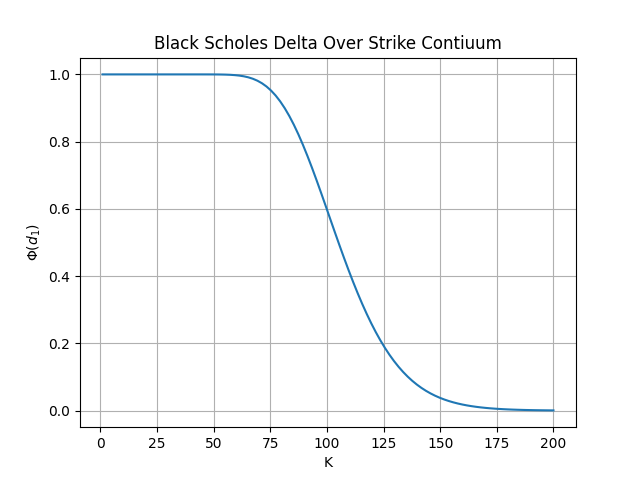

In [52]:
r = .03  # interest rate
sig = .2 # volatility
S0 = 100 # Initial Stock Price
T = 1 # Maturity

def bs_delta(S0, K, r, sig, T, call = True):
    d1 = (np.log(S0/K) + (r + sig**2/2) * T)/(sig*np.sqrt(T))
    norm = stats.norm
    if type(call) == bool:
        if call:
            return norm.cdf(d1,0,1)
        else:
            return norm.cdf(-d1,0,1)

K = np.linspace(1, 200, 100)
fig, ax = plt.subplots()

#fig.suptitle('matplotlib.axes.Axes.set_label() function \ Example\n', fontweight ="bold")
fig.set_label('my label')

line, = ax.plot(K, bs_delta(S0,K,r,sig,T,True))

ax.title.set_text(r'Black Scholes Delta Over Strike Contiuum')
ax.set_xlabel(r'K')
ax.set_ylabel(r'$\Phi(d_1)$')
ax.grid(True)

def update(change):
    #line.set_ydata(np.sin(change.new * x))
    line.set_ydata( bs_delta(S0,K,r,sig,change.new,True) )
    fig.canvas.draw()

slider = widgets.FloatSlider(
    value=1, 
    min=0, max=1, step=0.1,
    description=r'\(\tau\)',
    continuous_update=False
)
slider.observe(update, 'value')
display(slider)

In [13]:
 plt.gcf().number

4